# Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sorting_algorithms import Sorting_Algorithms

In [ ]:
df = pd.read_csv("../testes_ordenacao.csv")
df

,Algoritmo,NumeroEntradas,Tempo,TipoEntrada
0,BubbleSort1,1,0.000004,Aleatória
1,BubbleSort1,2,0.000002,Aleatória
2,BubbleSort1,3,0.000002,Aleatória
3,BubbleSort1,4,0.000001,Aleatória
4,BubbleSort1,6,0.000002,Aleatória
...,...,...,...,...
1035,BubbleSort20,96304,12.431542,Aleatória
1036,BubbleSort20,115609,18.201132,Aleatória
1037,BubbleSort20,138784,26.274318,Aleatória
1038,BubbleSort20,166604,38.121281,Aleatória


# Testando o Algoritmo

## Criar Sequência Númerica

In [ ]:
import math


def gerar_tamanhos_entrada_log_exp(max_log=1000, max_exp=10**6, num_log=30, num_exp=30):
    """
    Gera uma sequência de tamanhos de entrada para análise de desempenho de algoritmos.

    A sequência tem duas partes:
    - Crescimento logarítmico (num_log pontos) entre 1 e max_log
    - Crescimento exponencial (num_exp pontos) entre max_log e max_exp

    Os tamanhos são salvos num arquivo binário "tamanhos_entrada_log_exp.bin".

    Parâmetros:
        max_log (int): limite superior da parte logarítmica
        max_exp (int): tamanho máximo (último valor será exatamente max_exp)
        num_log (int): número de pontos na faixa logarítmica
        num_exp (int): número de pontos na faixa exponencial
    """

    # --- Crescimento logarítmico ---
    log_values = []
    for i in range(num_log):
        # interpolação logarítmica de 1 até max_log
        val = round(math.exp(math.log(1) + (math.log(max_log) - math.log(1)) * i / (num_log - 1)))
        log_values.append(max(1, val))  # garante mínimo 1

    # --- Crescimento exponencial ---
    exp_values = []
    base = (max_exp / max_log) ** (1 / (num_exp - 1))
    for i in range(num_exp):
        val = round(max_log * (base ** i))
        exp_values.append(val)
    exp_values[-1] = max_exp  # garante o último valor exato

    # --- Combina e remove duplicatas ---
    return sorted(set(log_values + exp_values))

In [ ]:
sequencia = gerar_tamanhos_entrada_log_exp(max_log=1000,max_exp=2*(10**5), num_log=25, num_exp=30)
print(sequencia)

[1, 2, 3, 4, 6, 7, 10, 13, 18, 24, 32, 42, 56, 75, 100, 133, 178, 237, 316, 422, 562, 750, 1000, 1200, 1441, 1730, 2077, 2493, 2993, 3593, 4313, 5177, 6215, 7461, 8957, 10752, 12907, 15495, 18601, 22330, 26806, 32179, 38629, 46373, 55668, 66827, 80223, 96304, 115609, 138784, 166604, 200000]


## Carregando o Algoritmo

In [ ]:
import os


dir_dll_path = os.path.join(os.getcwd(), 'C_Algorithms_Library.dll')
alg = Sorting_Algorithms(dir_dll_path)

NameError: name 'Sorting_Algorithms' is not defined

### Algoritmo escolhido

In [ ]:
nome_algoritmo = "QuickSort"

algoritmo_ordenacao = alg.quick_sort

## Gerando os vetores de entrada

### Entrada Crescente

### Entrada Aleatória

In [ ]:
tipo_entrada = "Aleatória"

In [ ]:
import struct
def ler_arquivo_binario(file_path):
    with open(file_path, 'rb') as f:
        # Lê o primeiro inteiro que indica o tamanho
        tamanho = struct.unpack('i', f.read(4))[0]  # 'i' é o formato para inteiro (4 bytes)
        
        # Lê os elementos de acordo com o tamanho
        elementos = []
        for _ in range(tamanho):
            elemento = struct.unpack('i', f.read(4))[0]  # Lê cada elemento inteiro
            elementos.append(elemento)
    
    # Retorna uma lista com os elementos
    return np.array(elementos, dtype=np.int32)

In [ ]:
# Lista para armazenar todos os dados
array_final = np.zeros(shape=(20,200000), dtype=np.int32)

# Carregar os arquivos binários de entrada_rand_1.bin até entrada_rand_20.bin
for i in range(1, 21):
    file_path = f'../entradas/entrada_rand{i}.bin'
    dados = ler_arquivo_binario(file_path)
    array_final[i - 1] = dados

array_final

array([[ 68010, 160782, 178355, ..., 106571, 141137, 128726],
       [ 44689,  62504, 138710, ..., 173419, 170883,  83043],
       [ 59248, 101933, 124725, ..., 187216,  77315, 136571],
       ...,
       [131582, 116415,  41832, ...,  25977, 176973,  68483],
       [137108,  44149,  13182, ...,  88118, 160148, 113400],
       [  2311, 154911,   9083, ..., 131874,  77187,  59901]],
      shape=(20, 200000), dtype=int32)

## Rodando o algoritmo

In [ ]:
novos_tempos = []

for i, array in enumerate(array_final):
    for j, seq_value in enumerate(sequencia):
        copia = array[:seq_value].copy()
        
        tempo_demorado = alg.run_sort_function(copia, sort_algorithm=algoritmo_ordenacao)

        novos_tempos.append(
                {
                    "Algoritmo": f"{nome_algoritmo}{i + 1}",
                    "NumeroEntradas": seq_value,
                    "Tempo": tempo_demorado,
                    "TipoEntrada": tipo_entrada
                }
            )

novo_algoritmo = pd.DataFrame(novos_tempos)

df = pd.concat([df, novo_algoritmo], ignore_index=True)
df

,Algoritmo,NumeroEntradas,Tempo,TipoEntrada
0,BubbleSort1,1,0.000004,Aleatória
1,BubbleSort1,2,0.000002,Aleatória
2,BubbleSort1,3,0.000002,Aleatória
3,BubbleSort1,4,0.000001,Aleatória
4,BubbleSort1,6,0.000002,Aleatória
...,...,...,...,...
3115,QuickSort20,96304,0.006100,Aleatória
3116,QuickSort20,115609,0.007334,Aleatória
3117,QuickSort20,138784,0.009212,Aleatória
3118,QuickSort20,166604,0.010909,Aleatória


# Gráficos

In [ ]:
import re


def extrair_prefixo(nome):
    match = re.match(r"[A-Za-z]+", nome)
    return match.group(0) if match else nome

In [ ]:
# Cria uma nova coluna com o prefixo
df_grafico = df.copy()

df_grafico['Grupo'] = df['Algoritmo'].apply(extrair_prefixo)

# Tempo em microsegundos
df_grafico['Tempo_us'] = df['Tempo'] * 1e6

# Calcula a média do tempo para cada grupo e número de entradas
df_stats = (
    df_grafico.groupby(['Grupo', 'NumeroEntradas'], as_index=False)['Tempo_us']
        .agg(['mean', 'std'])
        .reset_index()
        .rename(columns={'mean': 'TempoMedio', 'std': 'DesvioPadrao'})
)

# Plotando
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## Organizando os grupos

In [ ]:
def label_grupo(nome_grupo: str):
    label = nome_grupo

    if nome_grupo == "QuickSort":
        label = "Quick Sort (Pivô Início)"
    elif nome_grupo == "CentralQuickSort":
        label = "Quick Sort (Pivô Central)"
    
    return label

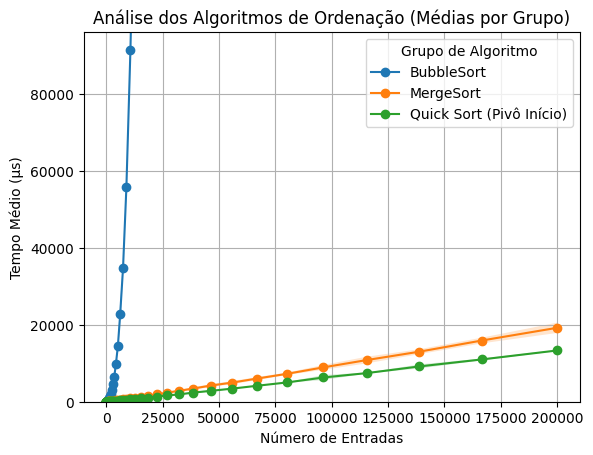

In [ ]:
grupos = df_stats['Grupo'].unique()

for grupo in grupos:
    df_grupo = df_stats[df_stats['Grupo'] == grupo]
    plt.plot(df_grupo['NumeroEntradas'], df_grupo['TempoMedio'], '-o', label=label_grupo(grupo))
    plt.fill_between(
        df_grupo['NumeroEntradas'],
        df_grupo['TempoMedio'] - df_grupo['DesvioPadrao'],
        df_grupo['TempoMedio'] + df_grupo['DesvioPadrao'],
        alpha=0.2
    )

plt.title('Análise dos Algoritmos de Ordenação (Médias por Grupo)')
plt.xlabel('Número de Entradas')
plt.ylabel('Tempo Médio (µs)')
plt.legend(title='Grupo de Algoritmo')

# limite_superior = (
#     df_stats[df_stats['Grupo'].isin(['MergeSort', 'QuickSort'])]
#     ['TempoMedio'].max() * 5.0  # adiciona 500% de folga visual
#     )

# plt.ylim(0, limite_superior)
plt.grid(True)
plt.show()


# (Opcional) Salvar Dados

In [ ]:
path_csv_final = "teste2.csv"

In [ ]:
df.to_csv(path_csv_final, index=False)